In [4]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### 设置参数

In [136]:
periods = [1/12, 1/4, 1/2, 1, 2, 3, 5, 7, 10] # 持有时间
security = 'sh000991' # 持有股票

In [137]:
asset = ak.stock_zh_index_daily(symbol=security)
stock.drop(columns=["open", "high", "low", "volume"], inplace=True)

### 任一时点持有资产一段时间的收益

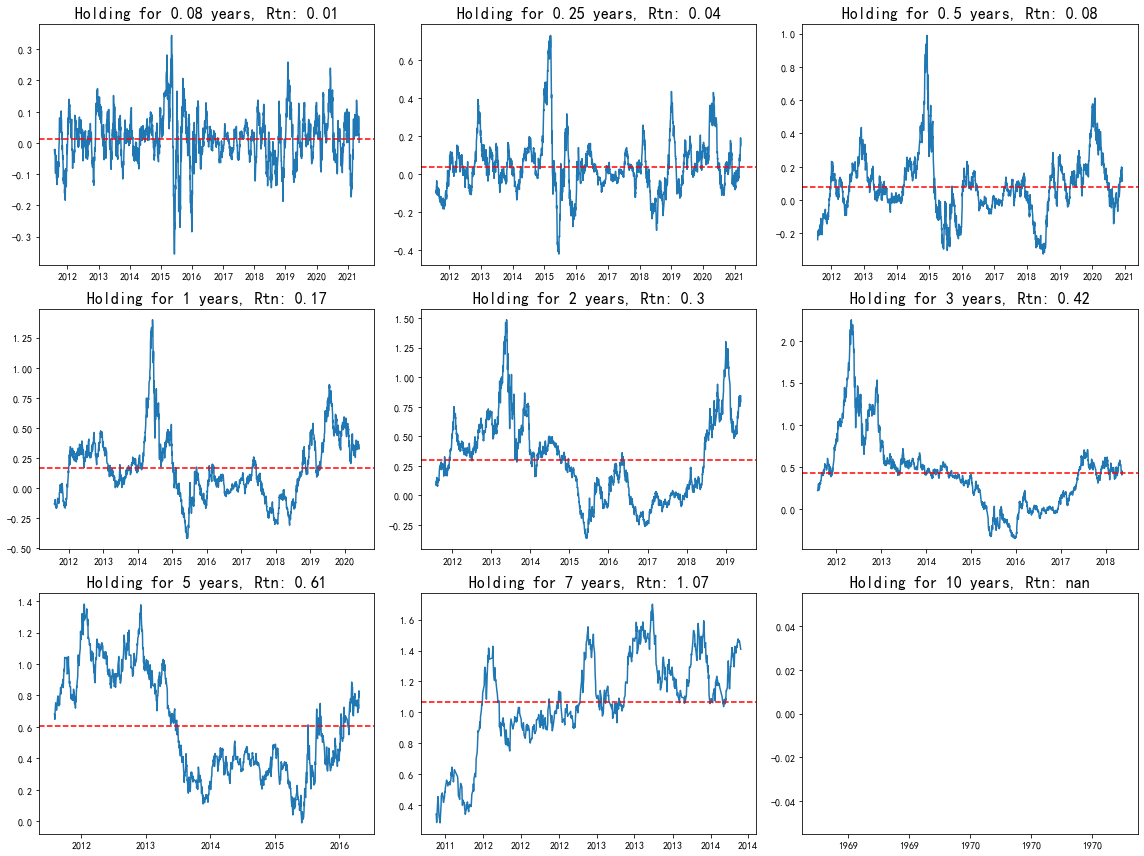

In [138]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12))

for i in range(len(periods)):
    stock = asset.copy()
    stock['nyr_later'] = stock['close'].shift(int(-250*periods[i]))
    stock['rtn'] = (stock['nyr_later'] - stock['close']) / stock['close']
        
    result = stock.iloc[:int(-250*periods[i])].reset_index()
    avg_rtn = result['rtn'].mean()
    
    ax[int(i/3), int(i%3)].plot(result['date'], result['rtn'])
    ax[int(i/3), int(i%3)].axhline(y=avg_rtn, color='r', linestyle='--')
    ax[int(i/3), int(i%3)].set_title(f'Holding for {round(periods[i], 2)} years, Rtn: {round(avg_rtn, 2)}', fontsize=16)
    ax[int(i/3), int(i%3)].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
fig.tight_layout()
plt.show()

### 持有任意资产一段时间回报的分布

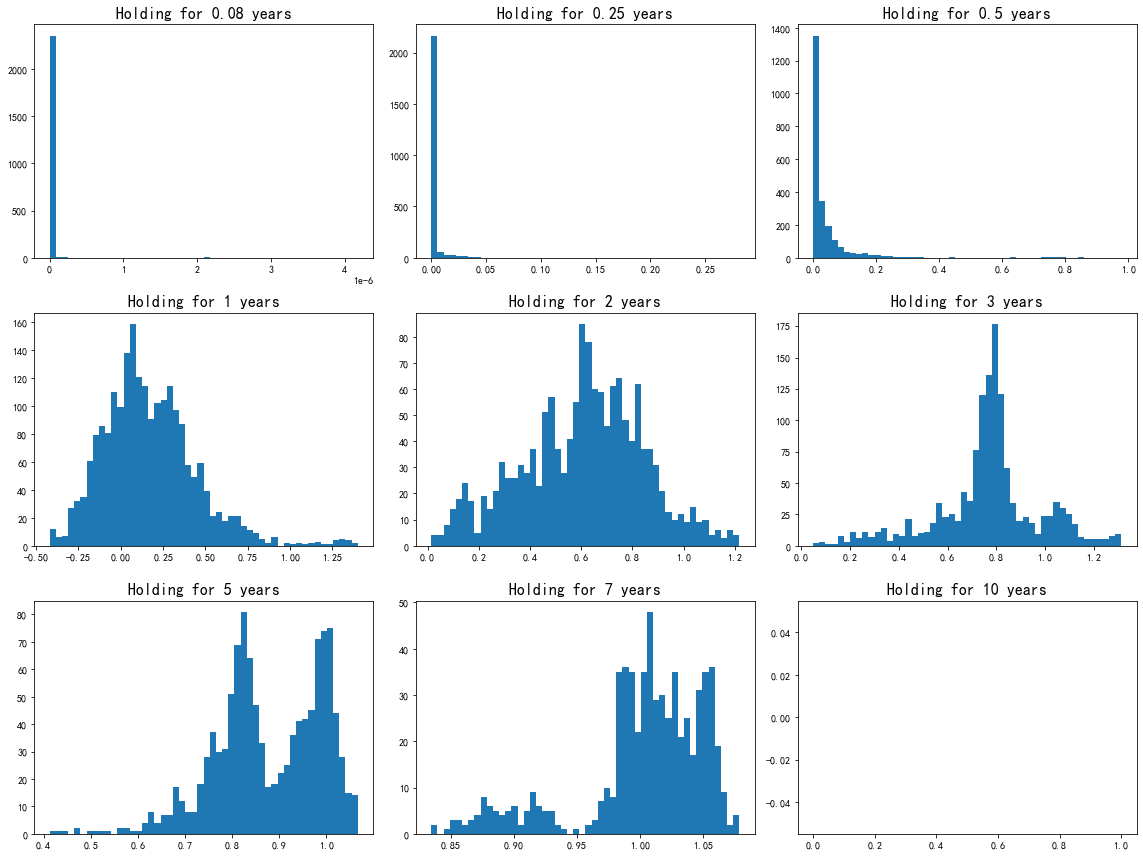

In [139]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12))

for i in range(len(periods)):
    stock = asset.copy()
    stock['nyr_later'] = stock['close'].shift(int(-250*periods[i]))
    stock['rtn'] = ((stock['nyr_later']-stock['close']) / stock['close'])
    result = stock.iloc[:int(-250*periods[i])].reset_index()
    avg_rtn = result['rtn'].mean()
    
    ax[int(i/3), int(i%3)].hist(result['rtn'], bins=50)
    ax[int(i/3), int(i%3)].set_title(f'Holding for {round(periods[i], 2)} years', fontsize=16)

fig.tight_layout()
plt.show()

### 持有不同标的资产t年的收入

In [19]:
assets = ['sh000016', 'sh000300', 'sh000905', 'sz399975']
t = 3

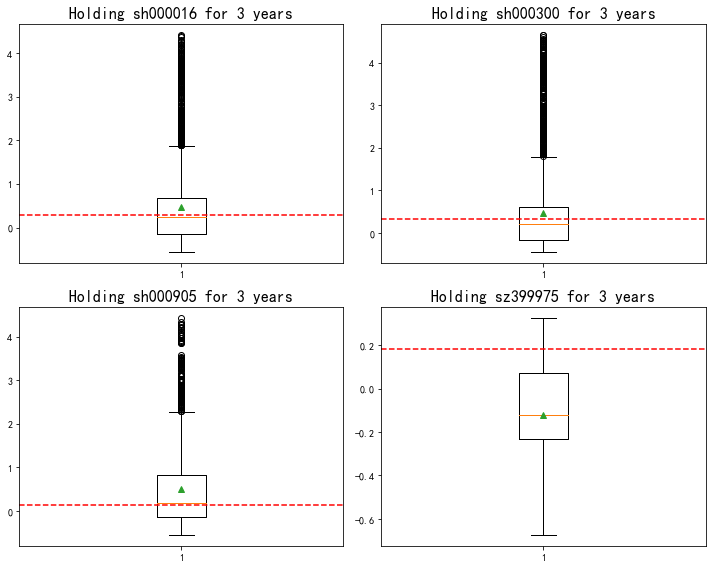

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i in range(len(assets)):
    asset = ak.stock_zh_index_daily(symbol=assets[i])
    asset.drop(columns=["open", "high", "low", "volume"], inplace=True)

    stock = asset.copy()
    stock['nyr_later'] = stock['close'].shift(int(-250*t))
    stock['rtn'] = (stock['nyr_later'] - stock['close']) / stock['close']
        
    result = stock.iloc[:int(-250*t)].reset_index()
    rtn_last = result.iloc[-1]['rtn']
    
    ax[int(i/2), int(i%2)].boxplot(result['rtn'], showmeans=True)
    ax[int(i/2), int(i%2)].axhline(rtn_last, color='r', linestyle='--')
    ax[int(i/2), int(i%2)].set_title(f'Holding {assets[i]} for {round(t, 2)} years', fontsize=16)
    
fig.tight_layout()
plt.savefig('holding.png')
plt.show()